In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Exploring log_mini

In [2]:
log_mini=pd.read_csv("/Users/nivedita/Library/Containers/com.microsoft.Excel/Data/Downloads/log_mini.csv")
tf_mini=pd.read_csv("/Users/nivedita/Library/Containers/com.microsoft.Excel/Data/Downloads/tf_mini.csv")

In [3]:
log_mini.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [4]:
log_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [5]:
log_mini['date'] = pd.to_datetime(log_mini['date'])
log_mini['session_day']=log_mini['date'].dt.day_name()
log_mini['session_month']=log_mini['date'].dt.month_name()

In [6]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_days = pd.api.types.CategoricalDtype(ordered = True, categories = days)
log_mini['session_day'] = log_mini['session_day'].astype(ordered_days)

In [7]:
log_mini.head(10)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,session_day,session_month
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,Sunday,July
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,Sunday,July
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,Sunday,July
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,Sunday,July
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,Sunday,July
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,20,t_c815228b-3212-4f9e-9d4f-9cb19b248184,False,False,True,False,0,1,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,fwdbtn,Sunday,July
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,20,t_e23c19f5-4c32-4557-aa44-81372c2e3705,True,True,True,False,0,1,...,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,Sunday,July
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,20,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,True,True,True,False,0,1,...,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,Sunday,July
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,20,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,False,True,True,False,0,1,...,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,Sunday,July
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,20,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,True,True,True,False,0,1,...,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,Sunday,July


In [9]:
log_mini['context_switch'] = log_mini['context_switch'].astype(bool)
log_mini['no_pause_before_play'] = log_mini['no_pause_before_play'].astype(bool)
log_mini['short_pause_before_play'] = log_mini['short_pause_before_play'].astype(bool)
log_mini['long_pause_before_play'] = log_mini['long_pause_before_play'].astype(bool)

In [11]:
log_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   session_id                       167880 non-null  object        
 1   session_position                 167880 non-null  int64         
 2   session_length                   167880 non-null  int64         
 3   track_id_clean                   167880 non-null  object        
 4   skip_1                           167880 non-null  bool          
 5   skip_2                           167880 non-null  bool          
 6   skip_3                           167880 non-null  bool          
 7   not_skipped                      167880 non-null  bool          
 8   context_switch                   167880 non-null  bool          
 9   no_pause_before_play             167880 non-null  bool          
 10  short_pause_before_play          167880 non-

In [13]:
log_mini.shape

(167880, 23)

In [15]:
log_mini.isna().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
session_day                        0
session_month                      0
dtype: int64

In [17]:
log_mini.duplicated().sum()

0

In [19]:
log_mini['context_type'].unique()

array(['editorial_playlist', 'user_collection', 'radio',
       'personalized_playlist', 'catalog', 'charts'], dtype=object)

In [21]:
log_mini['hist_user_behavior_reason_start'].unique()

array(['trackdone', 'fwdbtn', 'backbtn', 'clickrow', 'appload', 'playbtn',
       'remote', 'trackerror', 'endplay'], dtype=object)

In [24]:
log_mini['context_switch'].unique()

array([False,  True])

UNIVARIATE ANALYSIS

In [25]:
def countplot(data,x,title):
    color=sb.color_palette()[0]
    figure=sb.countplot(data = data, x = x,color=color);
    figure.set_xticklabels(figure.get_xticklabels(), rotation=40, ha="right");
    figure.set(title=title);

In [27]:
def ValueCount(data,column_name,ylabel,xlabel,title):
    data[column_name].value_counts().plot(kind='bar')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title);

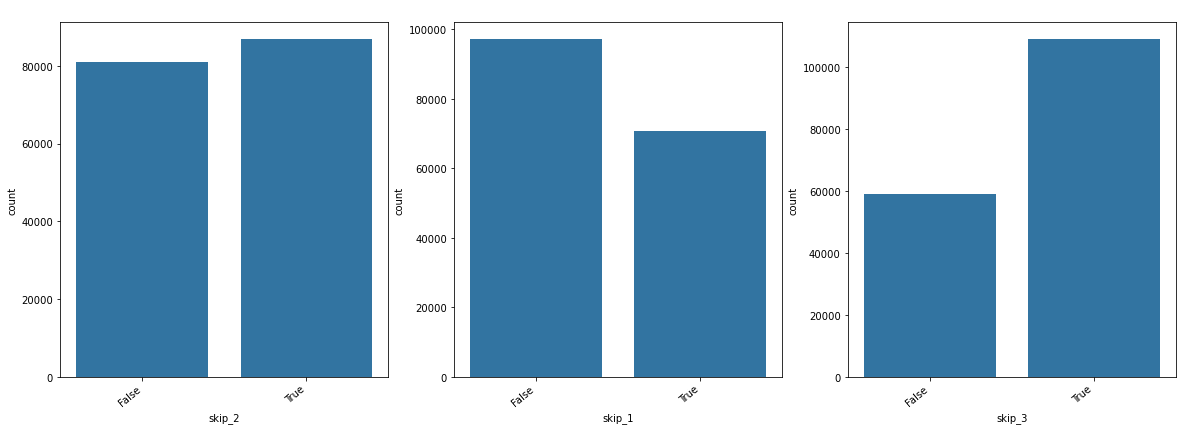

In [28]:
skips={'skip_1','skip_2','skip_3'}
fig, axes = plt.subplots(1,3,figsize= [20,30])

y=1

import seaborn as sns
for skip in skips:
        plt.subplot(4,3,y);
        countplot(log_mini,skip,' ');
        y=y+1      

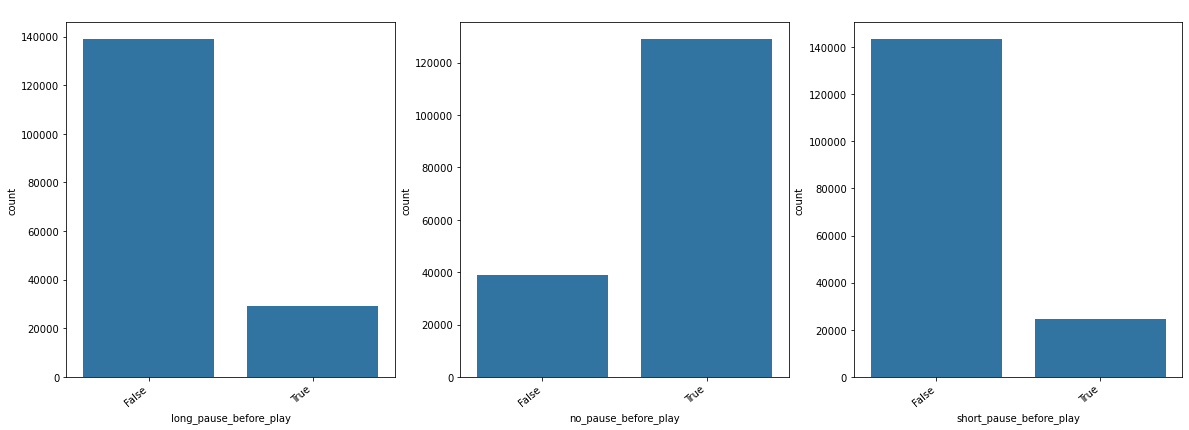

In [29]:
pauses={'no_pause_before_play','short_pause_before_play','long_pause_before_play'}
fig, axes = plt.subplots(1,3,figsize= [20,30])

y=1

import seaborn as sns
for pause in pauses:
        plt.subplot(4,3,y);
        countplot(log_mini,pause,' ');
        y=y+1
        

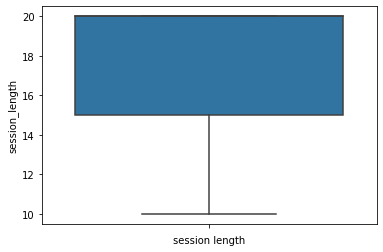

In [30]:
sb.boxplot(data = log_mini, y = 'session_length');
plt.xlabel('session length');

In [31]:
log_mini['session_length'].describe()

count    167880.000000
mean         17.651823
std           3.422025
min          10.000000
25%          15.000000
50%          20.000000
75%          20.000000
max          20.000000
Name: session_length, dtype: float64

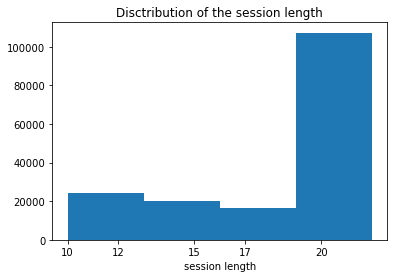

In [32]:
binsize=3
bins=np.arange(10,20+binsize,binsize)
plt.hist(data=log_mini, x='session_length', bins=bins);
plt.xticks([10,12,15,17,20]);
plt.xlabel('session length');
plt.title('Disctribution of the session length');

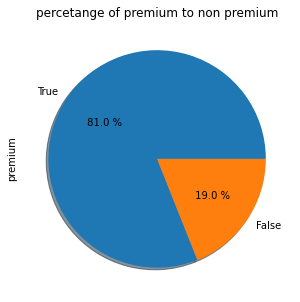

In [33]:
log_mini['premium'].value_counts().plot(kind='pie', autopct ='% 1.1f %%', shadow= True, figsize=(5,5));
plt.title('percetange of premium to non premium');

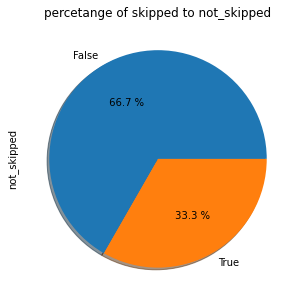

In [34]:
log_mini['not_skipped'].value_counts().plot(kind='pie', autopct ='% 1.1f %%', shadow= True, figsize=(5,5));
plt.title('percetange of skipped to not_skipped');

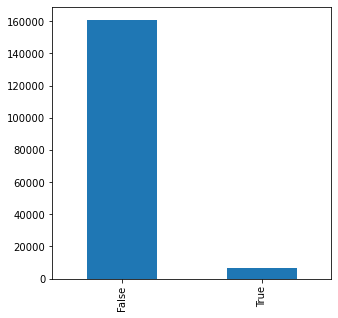

In [35]:
log_mini['context_switch'].value_counts().plot(kind='bar', figsize=(5,5))

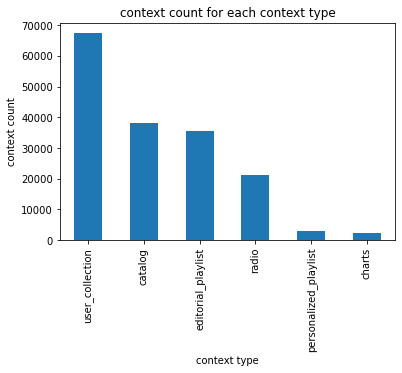

In [36]:
ValueCount(log_mini,'context_type','context count','context type','context count for each context type')

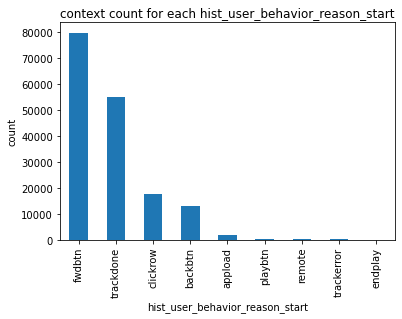

In [37]:
ValueCount(log_mini,'hist_user_behavior_reason_start','count','hist_user_behavior_reason_start','context count for each hist_user_behavior_reason_start')

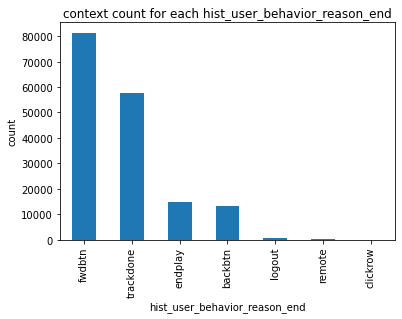

In [38]:
ValueCount(log_mini,'hist_user_behavior_reason_end','count','hist_user_behavior_reason_end','context count for each hist_user_behavior_reason_end')

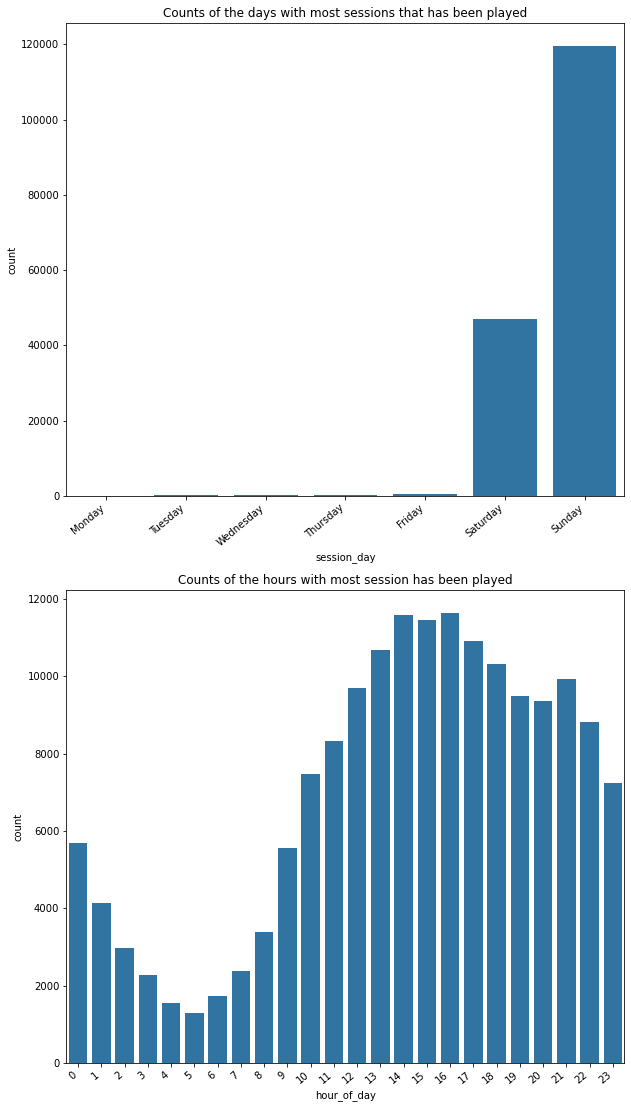

In [39]:
plt.figure(figsize = [10, 40]);
plt.subplot(4, 1, 1);
countplot(log_mini,'session_day','Counts of the days with most sessions that has been played');
plt.subplot(4, 1, 2);
countplot(log_mini,'hour_of_day','Counts of the hours with most session has been played');

BIVARIATE ANALYSIS

In [40]:
def countplot1(data,x,hue,title,xlabel,ylabel):
    sb.countplot(data=data, x=x, hue=hue);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);

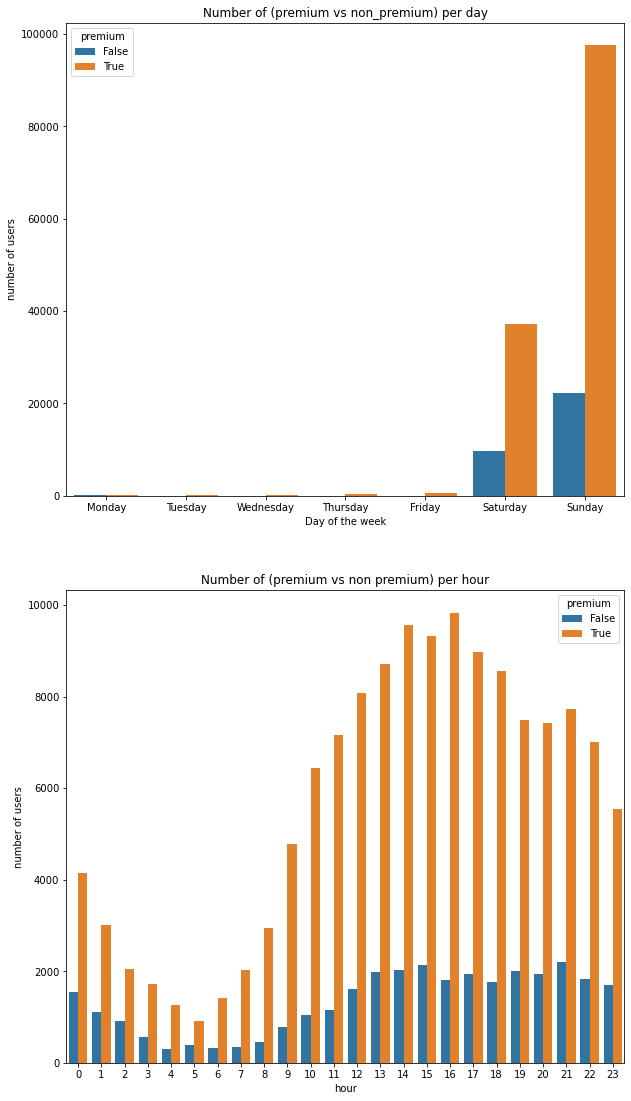

In [41]:
plt.figure(figsize = [10, 40]);
plt.subplot(4, 1, 1);
countplot1(log_mini,'session_day','premium','Number of (premium vs non_premium) per day','Day of the week','number of users')
plt.subplot(4, 1, 2);
countplot1(log_mini,'hour_of_day','premium','Number of (premium vs non premium) per hour','hour','number of users')

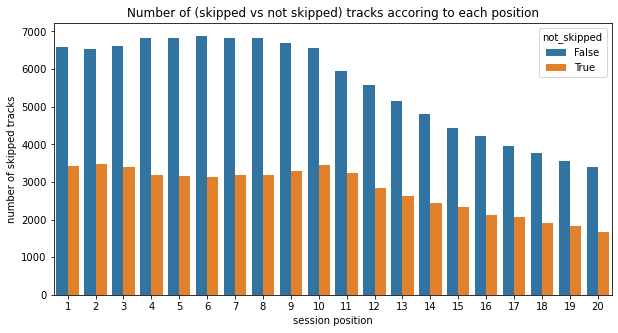

In [42]:
plt.figure(figsize = [10,5]);
countplot1(log_mini,'session_position','not_skipped','Number of (skipped vs not skipped) tracks accoring to each position','session position','number of skipped tracks')


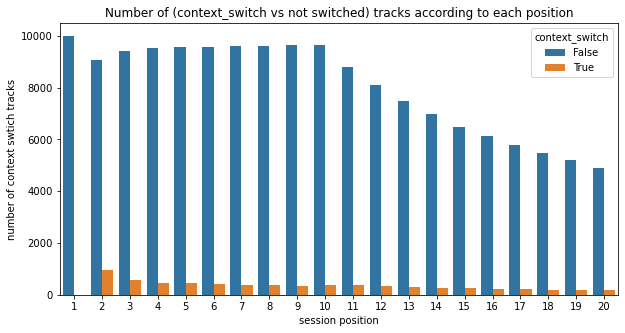

In [43]:
plt.figure(figsize = [10,5]);
countplot1(log_mini,'session_position','context_switch','Number of (context_switch vs not switched) tracks according to each position','session position','number of context swtich tracks')


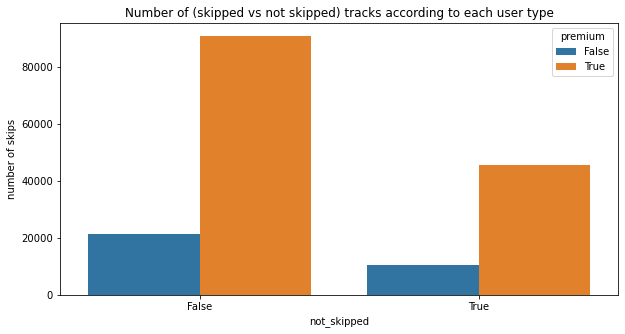

In [44]:
plt.figure(figsize = [10,5]);
countplot1(log_mini,'not_skipped','premium','Number of (skipped vs not skipped) tracks according to each user type','not_skipped','number of skips')

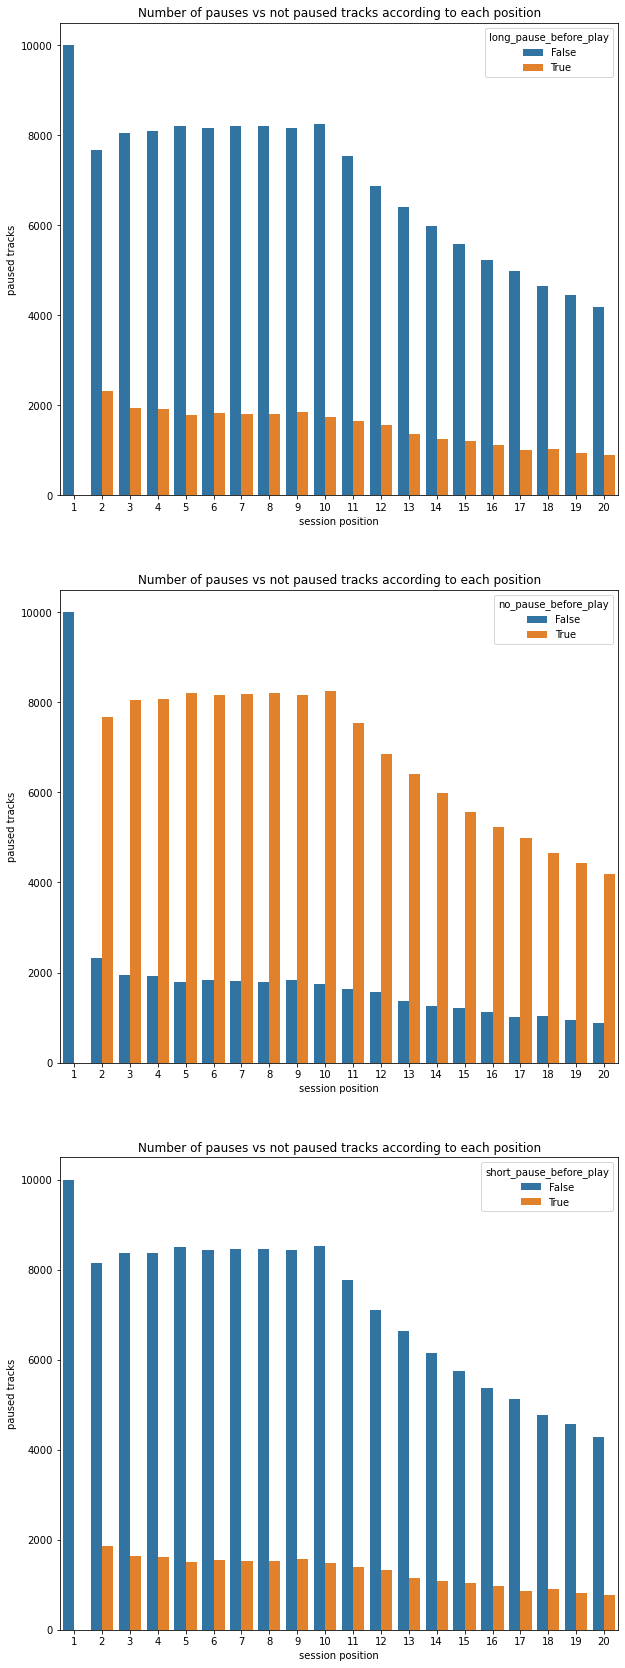

In [45]:
pauses={'no_pause_before_play','short_pause_before_play','long_pause_before_play'}
plt.figure(figsize = [10, 40]);

y=1

import seaborn as sns
for pause in pauses:
        plt.subplot(4, 1,y);
        countplot1(log_mini,'session_position',pause,'Number of pauses vs not paused tracks according to each position','session position','paused tracks') 
        
        y=y+1        

Exploring tf_mini

In [46]:
tf_mini.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [47]:
tf_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [48]:
tf_mini.isna().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

In [49]:
tf_mini.duplicated().sum()

0

In [50]:
tf_mini['track_duration_mins']=tf_mini['duration']/60

In [51]:
tf_mini['released_decade']=tf_mini['release_year']/10

In [52]:
tf_mini.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,track_duration_mins,released_decade
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907,1.828445,195.0
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,3.128222,195.0
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496,2.680667,195.1
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753,2.923333,195.1
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496,6.160000,195.1


In [53]:
tf_mini['released_decade'] = tf_mini['released_decade'].astype(int)

In [54]:
tf_mini.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,track_duration_mins,released_decade
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907,1.828445,195
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,3.128222,195
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496,2.680667,195
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753,2.923333,195
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496,6.160000,195


In [55]:
tf_mini['mode'].unique()

array(['major', 'minor'], dtype=object)

In [56]:
tf_mini['time_signature'].unique()


array([4, 3, 5, 1, 0])

UNIVARIATE ANALYSIS

In [57]:
def boxplot(data,x,y,title):
    color=sb.color_palette()[0]
    figure= sb.boxplot(data=data, x=x, y=y, color=color);
    figure.set_xticklabels(figure.get_xticklabels(), rotation=40, ha="right");
    figure.set(title=title);

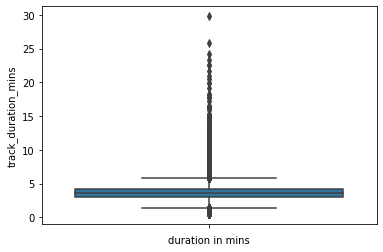

In [58]:
sb.boxplot(data = tf_mini, y = 'track_duration_mins');

plt.xlabel('duration in mins');

In [59]:
tf_mini['track_duration_mins'].describe()

count    50704.000000
mean         3.704466
std          1.203747
min          0.500222
25%          3.065556
50%          3.581111
75%          4.173778
max         29.796016
Name: track_duration_mins, dtype: float64

In [60]:
tf_mini['track_duration_mins'].describe(percentiles=[.99])

count    50704.000000
mean         3.704466
std          1.203747
min          0.500222
50%          3.581111
99%          7.806774
max         29.796016
Name: track_duration_mins, dtype: float64

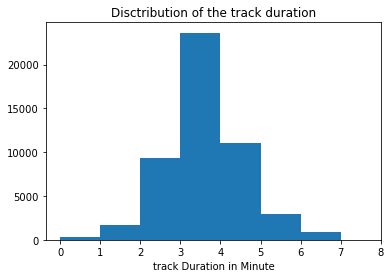

In [61]:
binsize=1
bins=np.arange(0,7+binsize,binsize)
plt.hist(data=tf_mini, x='track_duration_mins', bins=bins);
plt.xticks([0,1, 2, 3, 4, 5, 6, 7, 8]);
plt.xlabel('track Duration in Minute');
plt.title('Disctribution of the track duration');

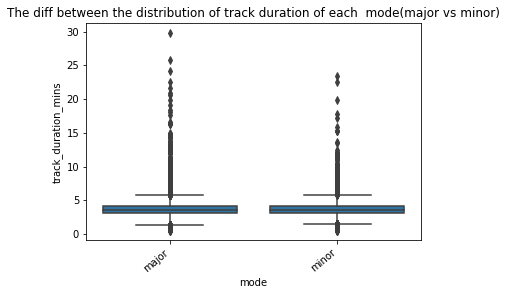

In [62]:
boxplot(tf_mini,'mode','track_duration_mins','The diff between the distribution of track duration of each  mode(major vs minor)');

In [63]:
tf_mini.release_year.min()

1950

In [64]:
tf_mini.release_year.max()

2018

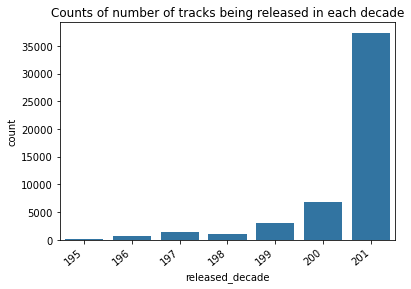

In [65]:
countplot(tf_mini,'released_decade','Counts of number of tracks being released in each decade');

Bivariate Analysis

In [66]:
correlations=tf_mini.corr()
upper_tri = correlations.where(np.triu(np.ones(correlations.shape),k=1).astype(np.bool))
to_show = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]

<ipython-input-66-ad485b8eff4c>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlations.where(np.triu(np.ones(correlations.shape),k=1).astype(np.bool))


In [67]:
to_show

['bounciness',
 'danceability',
 'dyn_range_mean',
 'loudness',
 'organism',
 'acoustic_vector_1',
 'track_duration_mins',
 'released_decade']

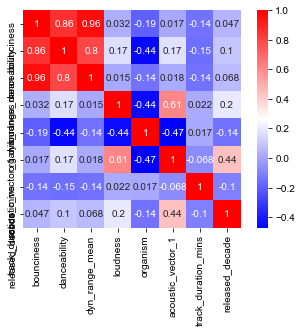

In [68]:
corr1=tf_mini[['bounciness',
 'danceability',
 'dyn_range_mean',
 'loudness',
 'organism',
 'acoustic_vector_1',
 'track_duration_mins',
 'released_decade']].corr()
sns.heatmap(data=corr1 ,square=True,cmap='bwr', annot = True)
sns.set(rc = {'figure.figsize':(20,20)})
plt.xticks(rotation=90);
plt.yticks(rotation=90);

Text(0.5, 1.0, 'relation-ship between us popularity estimate and the durations of the tracks')

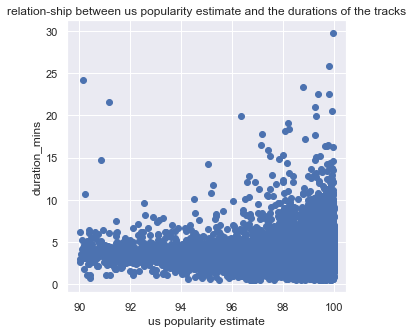

In [69]:
sns.set(rc = {'figure.figsize':(5,5)})
plt.scatter(x=tf_mini.us_popularity_estimate,y=tf_mini.track_duration_mins)
plt.xlabel('us popularity estimate');
plt.ylabel('duration_mins');
plt.title('relation-ship between us popularity estimate and the durations of the tracks')

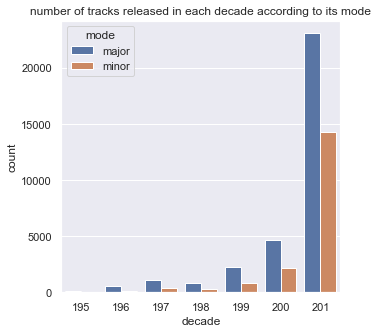

In [70]:
countplot1(tf_mini,'released_decade','mode','number of tracks released in each decade according to its mode','decade','count')

Analysis after Merging both datasets


In [72]:
log_mini.rename(columns = {'track_id_clean':'track_id'}, inplace = True)
log_mini.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,session_day,session_month
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,False,False,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,Sunday,July
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,False,True,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,Sunday,July
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,False,True,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,Sunday,July
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,False,True,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,Sunday,July
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,False,True,...,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,Sunday,July


In [73]:
whole_data=pd.merge(log_mini, tf_mini, on='track_id')

In [74]:
whole_data.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,track_duration_mins,released_decade
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,False,False,...,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,3.001111,201
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,False,False,...,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,3.001111,201
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,False,False,...,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,3.001111,201
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,False,True,...,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,3.001111,201
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,False,False,...,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,3.001111,201


In [75]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   session_id                       167880 non-null  object        
 1   session_position                 167880 non-null  int64         
 2   session_length                   167880 non-null  int64         
 3   track_id                         167880 non-null  object        
 4   skip_1                           167880 non-null  bool          
 5   skip_2                           167880 non-null  bool          
 6   skip_3                           167880 non-null  bool          
 7   not_skipped                      167880 non-null  bool          
 8   context_switch                   167880 non-null  bool          
 9   no_pause_before_play             167880 non-null  bool          
 10  short_pause_before_play          167880 non-

In [76]:
whole_data['track_duration_mins'].describe(percentiles=[.99])

count    167880.000000
mean          3.598225
std           1.003727
min           0.500222
50%           3.533784
99%           6.899121
max          29.796016
Name: track_duration_mins, dtype: float64

In [77]:
whole_data = whole_data[whole_data['track_duration_mins'] <=6.9]

Text(0.5, 1.0, 'Disctribution of the track duration')

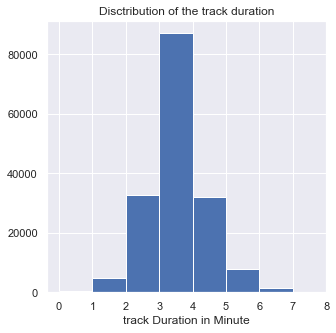

In [78]:
binsize=1
bins=np.arange(0,7+binsize,binsize)
plt.hist(data=whole_data, x='track_duration_mins', bins=bins);
plt.xticks([0,1, 2, 3, 4, 5, 6, 7, 8]);
plt.xlabel('track Duration in Minute');
plt.title('Disctribution of the track duration')